In [1]:
from numpy import *
import pylab as p
# Definition of parameters
mu= 2.0
def dX_dt(X, t=0):
    xp=X[1]
    yp=mu*(1-X[0]**2)*X[1]-X[0]
    return array([xp, yp ])

In [12]:
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt

stoptime = 15.0
numpoints = 5000

#Tiempo
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = -1
v0 = -1

#Resolver ecuaciones
x, y = odeint(dX_dt,(x0,v0),t).T

with open('Prueba3.dat', 'w') as archivo:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=archivo)

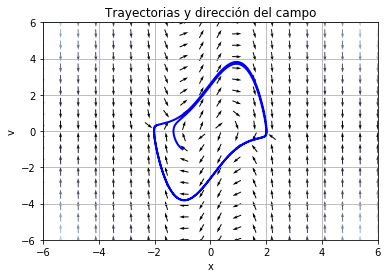

In [14]:
from numpy import loadtxt
from numpy import *
import pylab as p
from matplotlib.font_manager import FontProperties
from scipy import integrate
%matplotlib inline


#-------------------------------------------------------
# define a grid and compute direction at each point
nb_points   = 20

x = linspace(-6, 6, nb_points)
y = linspace(-6, 6, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed

Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.bone)
p.grid()

lw=2

t1, x1, y1 = loadtxt('Prueba3git.dat', unpack=True)


p.plot(x1, y1, 'blue', linewidth=lw)


p.xlim(-6, 6)
p.ylim(-6, 6)

p.xlabel('x')
p.ylabel('v')

p.title('Trayectorias y dirección del campo')
p.savefig('Prueba3.png', dpi=100)